# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

<h2><font color='red'>preprocessing of project grade categories</font></h2>

In [7]:
clean_project_grade_cat = []
for i in project_data["project_grade_category"]:
    cat = re.sub(r" ", "_", i)
    cat = re.sub(r"-","_", cat)
    clean_project_grade_cat.append(cat.lower())
    
project_data["project_grade_category"] = clean_project_grade_cat  

<h2><font color='red'>preprocessing of teacher prefix</font></h2>

In [8]:
print (project_data["teacher_prefix"].value_counts())

def removeNan(val):
    if val != val:
        return 'Mrs'
    return val
        

clean_teacher_prefix = project_data["teacher_prefix"].map(removeNan)
project_data["teacher_prefix"] = clean_teacher_prefix

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64


## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:33<00:00, 1166.46it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
title = decontracted(project_data['project_title'].values[2000])

In [21]:
# similarly you can preprocess the titles also
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = ' '.join(f for f in title.split() if f not in stopwords)
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    
    clean_titles.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 25795.17it/s]


In [22]:
project_data['clean_titles'] = clean_titles

In [23]:
project_data.drop(['project_title'],axis=1,inplace= True)

<h2><font color='red'>Number of words in title </font></h2>

In [24]:
title_word_count = []
for words in project_data['clean_titles']:
    words_len = len(words.split())
    title_word_count.append(words_len)

In [25]:
project_data['title_word_count'] = title_word_count

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                       clean_titles  title_word_count  
0  educational support for english learners at home                 7  
1              wanted projector for hungry learners                 5

<h2><font color='red'>Number of words in essay </font></h2>

In [27]:
project_data["clean_essays"] = preprocessed_essays

In [28]:
project_data.drop(['essay'], axis=1, inplace=True)

In [29]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                       clean_titles  title_word_count  \
0  educational support for english learners at home                 7   
1              wanted projector for hungry learners                 5   

                                        clean_essays  
0  my students english learners working english s...  
1  our students arrive school eager learn they po...

In [30]:
essay_word_count = []
for word in project_data["clean_essays"]:
    word_count = len(word.split())
    essay_word_count.append(word_count)

In [31]:
project_data["essay_word_count"]=essay_word_count

In [32]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                       clean_titles  title_word_count  \
0  educational support for english learners at home                 7   
1              wanted projector for hungry learners                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               161  
1  our students arrive school eager learn they po...               109

<h2><font color='red'>Calculating sentiment scores of essay </font></h2>

In [33]:
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
#VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for sentance in tqdm(project_data['clean_essays']):
    score_neg = senti_analyzer.polarity_scores(sentance)['neg']
    score_pos = senti_analyzer.polarity_scores(sentance)['pos']
    score_neu = senti_analyzer.polarity_scores(sentance)['neu']
    score_comp = senti_analyzer.polarity_scores(sentance)['compound']
    neg.append(score_neg)
    pos.append(score_pos)
    neu.append(score_neu)
    compound.append(score_comp)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SACHEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\SACHEEN\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [21:49<00:00, 83.42it/s]


In [35]:
project_data['pos'] = pos
project_data['neg'] = neg
project_data['neu'] = neu
project_data['compound'] = compound

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(project_data,project_data['project_is_approved'],test_size=0.33,
                                                 stratify=project_data['project_is_approved'],random_state=0)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.33,stratify=y_train,random_state=0)

In [37]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_titles',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

In [38]:
X_train.drop(['project_is_approved'],axis=1,inplace = True)
X_test.drop(['project_is_approved'],axis=1,inplace= True)
X_cv.drop(['project_is_approved'],axis=1,inplace= True)

In [39]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
75742      118221  p186156  f50f55a2b44b65b54f38f03c5df21922           Mrs.   
61001       57644  p180433  9e0fb5827f551d7e6966f8b3985e387b            Ms.   

      school_state project_submitted_datetime project_grade_category  \
75742           TX        2017-03-01 16:21:46            grades_9_12   
61001           NY        2017-03-09 10:19:06             grades_6_8   

                                         project_essay_1  \
75742  My students are creative human beings.  They a...   
61001  The Hyde Park Central School District is locat...   

                                         project_essay_2 project_essay_3  \
75742  It's no secret that the arts are underfunded i...             NaN   
61001  One area my students struggle the most with is...             NaN   

         ...      clean_categories clean_subcategories  \
75742    ...            Music_Arts          VisualArts   
61001    ...     Literacy_Language    ForeignLanguages   

                                            clean_titles title_word_count  \
75742  i waste a multi media art installation on elec...               10   
61001  authentic listening and speaking activities fo...               10   

                                            clean_essays essay_word_count  \
75742  my students creative human beings they sculptu...              145   
61001  the hyde park central school district located ...              161   

         pos    neg    neu  compound  
75742  0.169  0.105  0.726    0.8684  
61001  0.121  0.014  0.865    0.9524  

[2 rows x 23 columns]

<h2><font color='red'>one hot vector for clean categories of Projects (train,test,cv) </font></h2>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.vocabulary)
print(vectorizer.vocabulary_)
catogories_ohe_train = vectorizer.transform(X_train['clean_categories'].values)
catogories_ohe_test = vectorizer.transform(X_test['clean_categories'].values)
catogories_ohe_cv = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())

None
{'music_arts': 6, 'literacy_language': 4, 'math_science': 5, 'health_sports': 2, 'specialneeds': 7, 'history_civics': 3, 'appliedlearning': 0, 'warmth': 8, 'care_hunger': 1}
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h2><font color='red'>one hot vector for clean sub categories of Projects (train,test,cv) </font></h2>

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.vocabulary)
print(vectorizer.vocabulary_)
sub_catogories_ohe_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_catogories_ohe_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_catogories_ohe_cv = vectorizer.transform(X_cv['clean_subcategories'].values)

None
{'visualarts': 28, 'foreignlanguages': 12, 'mathematics': 19, 'literacy': 17, 'appliedsciences': 0, 'performingarts': 24, 'health_lifescience': 14, 'teamsports': 27, 'specialneeds': 26, 'esl': 9, 'literature_writing': 18, 'environmentalscience': 8, 'health_wellness': 15, 'socialsciences': 25, 'history_geography': 16, 'college_careerprep': 4, 'earlydevelopment': 6, 'other': 22, 'nutritioneducation': 21, 'financialliteracy': 11, 'gym_fitness': 13, 'charactereducation': 2, 'music': 20, 'extracurricular': 10, 'warmth': 29, 'care_hunger': 1, 'parentinvolvement': 23, 'communityservice': 5, 'economics': 7, 'civics_government': 3}


<h2><font color='red'>one hot vector for school states Projects (train,test,cv) </font></h2>

In [42]:
from collections import Counter
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [43]:
print(my_counter)

Counter({'CA': 15388, 'TX': 7396, 'NY': 7318, 'FL': 6185, 'NC': 5091, 'IL': 4350, 'GA': 3963, 'SC': 3936, 'MI': 3161, 'PA': 3109, 'IN': 2620, 'MO': 2576, 'OH': 2467, 'LA': 2394, 'MA': 2389, 'WA': 2334, 'OK': 2276, 'NJ': 2237, 'AZ': 2147, 'VA': 2045, 'WI': 1827, 'AL': 1762, 'UT': 1731, 'TN': 1688, 'CT': 1663, 'MD': 1514, 'NV': 1367, 'MS': 1323, 'KY': 1304, 'OR': 1242, 'MN': 1208, 'CO': 1111, 'AR': 1049, 'ID': 693, 'IA': 666, 'KS': 634, 'NM': 557, 'DC': 516, 'HI': 507, 'ME': 505, 'WV': 503, 'NH': 348, 'AK': 345, 'DE': 343, 'NE': 309, 'SD': 300, 'RI': 285, 'MT': 245, 'ND': 143, 'WY': 98, 'VT': 80})


In [44]:
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(),key=lambda kv:kv[1]))

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

school_state_catogories_ohe_train = vectorizer.transform(X_train['school_state'].values)
school_state_catogories_ohe_test = vectorizer.transform(X_test['school_state'].values)
school_state_catogories_ohe_cv = vectorizer.transform(X_cv['school_state'].values)

<h2><font color='red'>one hot vector for Project grade category(train,test,cv) </font></h2>

In [46]:
#print(project_data['project_grade_category'])

In [47]:
#my_counter = Counter()
#for grade in preprocessing_project_grade_categories:
#    my_counter.update(grade.split())

In [48]:
#print(my_counter)

In [49]:
#catogories_grade_dict = dict(my_counter)
#sorted_catogories_grade_dict = dict(sorted(catogories_grade_dict.items(),key=lambda kv:kv[1]))

In [50]:
#print(sorted_catogories_grade_dict)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

catogories_grade_train_ohe = vectorizer.transform(X_train['project_grade_category'].values)
catogories_grade_test_ohe = vectorizer.transform(X_test['project_grade_category'].values)
catogories_grade_cv_ohe = vectorizer.transform(X_cv['project_grade_category'].values)


<h2><font color='red'>one hot vector for teacher prefix(train,test,cv) </font></h2>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

teacher_prefix_train_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
teacher_prefix_test_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
teacher_prefix_cv_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)

## 1.5 Preparing data for models

In [53]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_titles',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [54]:
# we use count vectorizer to convert the values into one 
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
#print(vectorizer.get_feature_names())
#print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [55]:
# we use count vectorizer to convert the values into one 
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
#print(vectorizer.get_feature_names())
#print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [56]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

<h2><font color='red'>Bag of words For Essay</font></h2>

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_essay = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_bow_essay.fit(X_train['clean_essays'])

bow_train_text = vectorizer_bow_essay.transform(X_train['clean_essays'])
bow_test_text = vectorizer_bow_essay.transform(X_test['clean_essays'])
bow_cv_text = vectorizer_bow_essay.transform(X_cv['clean_essays'])

<h2><font color='red'>Bag of words For Title</font></h2>

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_title = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_bow_title.fit(X_train['clean_titles'])

bow_title_train = vectorizer_bow_title.transform(X_train['clean_titles'])
bow_title_test =vectorizer_bow_title.transform(X_test['clean_titles'])
bow_title_cv = vectorizer_bow_title.transform(X_cv['clean_titles'])

<h2><font color='red'>TFIDF of words For Essay</font></h2>

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_tfidf_essay.fit(X_train['clean_essays'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(2, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [60]:
tfidf_train_text = vectorizer_tfidf_essay.transform(X_train['clean_essays'])
tfidf_test_text = vectorizer_tfidf_essay.transform(X_test['clean_essays'])
tfidf_cv_text = vectorizer_tfidf_essay.transform(X_cv['clean_essays'])

<h2><font color='red'>TFIDF of words For Title</font></h2>

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_tfidf_title.fit(X_train['clean_titles'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(2, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [62]:
tfidf_title_train = vectorizer_tfidf_title.transform(X_train['clean_titles'])
tfidf_title_test = vectorizer_tfidf_title.transform(X_test['clean_titles'])
tfidf_title_cv = vectorizer_tfidf_title.transform(X_cv['clean_titles'])

print(tfidf_title_train.shape,y_train.shape)
print(tfidf_title_test.shape,y_test.shape)
print(tfidf_title_cv.shape,y_cv.shape)

(49041, 2680) (49041,)
(36052, 2680) (36052,)
(24155, 2680) (24155,)


In [63]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2><font color='red'>AVG W2V ESSAY of words</font></h2>

In [64]:
avg_w2v_essay_train = []
from tqdm import tqdm
for sentence in tqdm(X_train['clean_essays']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train.append(vector)

print(len(avg_w2v_essay_train))
print(len(avg_w2v_essay_train[1]))    

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:22<00:00, 2193.52it/s]


49041
300


In [65]:
avg_w2v_essay_test = []
from tqdm import tqdm
for sentence in tqdm(X_test['clean_essays']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test.append(vector)
print(len(avg_w2v_essay_test))
print(len(avg_w2v_essay_test[1]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:16<00:00, 2155.80it/s]


36052
300


In [66]:
avg_w2v_essay_cv = []
for sentance in tqdm(X_cv['clean_essays']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv.append(vector)

print(len(avg_w2v_essay_cv))
print(len(avg_w2v_essay_cv[1]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:11<00:00, 2078.58it/s]


24155
300


<h2><font color='red'>AVG W2V TITLE of words</font></h2>

In [67]:
avg_w2v_title_train = []
from tqdm import tqdm
for sentence in tqdm(X_train['clean_titles']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[1])) 

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:20<00:00, 2433.42it/s]


49041
300


In [68]:
avg_w2v_title_test = []
from tqdm import tqdm
for sentence in tqdm(X_test['clean_titles']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)
print(len(avg_w2v_title_test))
print(len(avg_w2v_title_test[1]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:14<00:00, 2486.48it/s]


36052
300


In [69]:
avg_w2v_title_cv = []
for sentance in tqdm(X_cv['clean_titles']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentance.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

print(len(avg_w2v_title_cv))
print(len(avg_w2v_title_cv[1]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 33314.42it/s]


24155
300


#### 1.5.2.1 Bag of words

In [70]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10)
#text_bow = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_bow.shape)

In [71]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [72]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10)
#text_tfidf = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [73]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [74]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#with open('glove_vectors', 'rb') as f:
#    model = pickle.load(f)
#    glove_words =  set(model.keys())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
#avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(preprocessed_essays): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    cnt_words =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if word in glove_words:
#            vector += model[word]
#            cnt_words += 1
#    if cnt_words != 0:
#        vector /= cnt_words
#    avg_w2v_vectors.append(vector)
#
#print(len(avg_w2v_vectors))
#print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [76]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
#tfidf_model.fit(preprocessed_essays)
## we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
#tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(X_train['clean_essays'])
dictionary = dict(zip(tfidf_model_train.get_feature_names(),list(tfidf_model_train.idf_)))
tfidf_words = set(tfidf_model_train.get_feature_names())

In [78]:
# average Word2Vec
# compute average word2vec for each review.
#tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(preprocessed_essays): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if (word in glove_words) and (word in tfidf_words):
#            vec = model[word] # getting the vector for each word
#            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#            vector += (vec * tf_idf) # calculating tfidf weighted w2v
#            tf_idf_weight += tf_idf
#    if tf_idf_weight != 0:
#        vector /= tf_idf_weight
#    tfidf_w2v_vectors.append(vector)
#
#print(len(tfidf_w2v_vectors))
#print(len(tfidf_w2v_vectors[0]))

<h2><font color='red'>TFIDF vectorizer Essay of words</font></h2>

In [79]:
tfidf_w2v_essay_train = []
for sentances in tqdm(X_train['clean_essays']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for word in sentances.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentances.count(words)/len(sentance.split()))
            vector += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector/=tfidf_weight
    tfidf_w2v_essay_train.append(vectors)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[1]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:05<00:00, 753.49it/s]


49041
300


In [80]:
tfidf_w2v_essay_test = []
for sentance in tqdm(X_test['clean_essays']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for words in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentance.count(word)/(len(sentance.split())))
            vectors += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vectors /= tfidf_weight
    tfidf_w2v_essay_test.append(vectors)
    
print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[1]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:52<00:00, 319.59it/s]


36052
300


In [81]:
tfidf_w2v_essay_cv = []
for sentance in tqdm(X_cv['clean_essays']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentance.count(word)/(len(sentance.split())))
            vector += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector /= tfidf_weight
    tfidf_w2v_essay_cv.append(vector)

print(len(tfidf_w2v_essay_cv))
print(len(tfidf_w2v_essay_cv[1]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:23<00:00, 288.87it/s]


24155
300


<h2><font color='red'>TFIDF vectorizer Title of words</font></h2>

In [82]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(X_train['clean_titles'])
dictionary = dict(zip(tfidf_model_train.get_feature_names(),list(tfidf_model_train.idf_)))
tfidf_words = set(tfidf_model_train.get_feature_names())

In [83]:
tfidf_w2v_title_train = []
for sentances in tqdm(X_train['clean_titles']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for word in sentances.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentances.count(words)/len(sentance.split()))
            vector += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector/=tfidf_weight
    tfidf_w2v_title_train.append(vectors)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[1]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:05<00:00, 9070.69it/s]


49041
300


In [84]:
tfidf_w2v_title_test = []
for sentance in tqdm(X_test['clean_titles']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for words in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentance.count(word)/(len(sentance.split())))
            vectors += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vectors /= tfidf_weight
    tfidf_w2v_title_test.append(vectors)
    
print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[1]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:02<00:00, 17123.87it/s]


36052
300


In [85]:
tfidf_w2v_title_cv = []
for sentance in tqdm(X_cv['clean_titles']):
    vectors = np.zeros(300)
    tfidf_weight = 0
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentance.count(word)/(len(sentance.split())))
            vector += (vec * tf_idf)
            tfidf_weight += tf_idf
    if tfidf_weight != 0:
        vector /= tfidf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[1]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 15485.68it/s]


24155
300


### 1.5.3 Vectorizing Numerical features

In [86]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [87]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

     ...                                         clean_titles  \
0    ...     educational support for english learners at home   
1    ...                 wanted projector for hungry learners   

  title_word_count                                       clean_essays  \
0                7  my students english learners working english s...   
1                5  our students arrive school eager learn they po...   

   essay_word_count    pos    neg    neu  compound  price  quantity  
0               161  0.144  0.012  0.844    0.9694  154.6        23  
1               109  0.283  0.048  0.669    0.9856  299.0         1  

[2 rows x 26 columns]

In [88]:
X_train = pd.merge(X_train,price_data,on='id',how='left')
X_test = pd.merge(X_test,price_data,on='id',how='left')
X_cv = pd.merge(X_cv,price_data,on='id',how='left')

In [89]:
print(X_train.head(2))
print("*"*70)
print(X_test.head(2))
print("*"*50)
print(X_cv.head(2))

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      118221  p186156  f50f55a2b44b65b54f38f03c5df21922           Mrs.   
1       57644  p180433  9e0fb5827f551d7e6966f8b3985e387b            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           TX        2017-03-01 16:21:46            grades_9_12   
1           NY        2017-03-09 10:19:06             grades_6_8   

                                     project_essay_1  \
0  My students are creative human beings.  They a...   
1  The Hyde Park Central School District is locat...   

                                     project_essay_2 project_essay_3  \
0  It's no secret that the arts are underfunded i...             NaN   
1  One area my students struggle the most with is...             NaN   

     ...                                          clean_titles  \
0    ...     i waste a multi media art installation on elec...   
1    ...     authentic listening and speaking activ

In [90]:
## check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
## standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#from sklearn.preprocessing import StandardScaler
#
## price_standardized = standardScalar.fit(project_data['price'].values)
## this will rise the error
## ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
## Reshape your data either using array.reshape(-1, 1)
#
#price_scalar = StandardScaler()
#price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
#
## Now standardize the data with above maen and variance.
#price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [91]:
X_train['price'].values.reshape(1,-1).shape

(1, 49041)

In [92]:
X_train['price'].values.reshape(1,-1)

array([[945.9 , 100.63, 184.86, ..., 479.99, 388.07, 269.  ]])

<h2><font color='red'>Vectorizing Numerical features Price Data</font></h2>

In [93]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))

print(price_train.shape,y_train.shape)
print(price_test.shape,y_test.shape)
print(price_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features Quantity Data</font></h2>

In [94]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))

print(quantity_train.shape,y_train.shape)
print(quantity_test.shape,y_test.shape)
print(quantity_cv.shape,y_cv.shape)


(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features number of previously proposed by teacher Data</font></h2>

In [95]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'clean_titles', 'title_word_count',
       'clean_essays', 'essay_word_count', 'pos', 'neg', 'neu', 'compound',
       'price', 'quantity'],
      dtype='object')

In [96]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

previous_posted_project_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_posted_project_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_posted_project_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(previous_posted_project_train.shape,y_train.shape)
print(previous_posted_project_test.shape,y_test.shape)
print(previous_posted_project_cv.shape,y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


<h2><font color='red'>Vectorizing Numerical features title word count Data</font></h2>

In [97]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))

print(title_word_count_train.shape,y_train.shape)
print(title_word_count_test.shape,y_test.shape)
print(title_word_count_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features essay word count Data</font></h2>

In [98]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))

print(essay_word_count_train.shape,y_train.shape)
print(essay_word_count_test.shape,y_test.shape)
print(essay_word_count_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet positive</font></h2>

In [99]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['pos'].values.reshape(1,-1))

pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1))
pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1))
pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1))

print(pos_train.shape,y_train.shape)
print(pos_test.shape,y_test.shape)
print(pos_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet negative</font></h2>

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['neg'].values.reshape(1,-1))

neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1))
neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1))
neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1))

print(neg_train.shape,y_train.shape)
print(neg_test.shape,y_test.shape)
print(neg_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet neutral</font></h2>

In [101]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['neu'].values.reshape(1,-1))

neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1))
neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1))
neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1))

print(neu_train.shape,y_train.shape)
print(neu_test.shape,y_test.shape)
print(neu_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet compound</font></h2>

In [102]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['compound'].values.reshape(1,-1))

compound_train = normalizer.transform(X_train['compound'].values.reshape(1,-1))
compound_test = normalizer.transform(X_test['compound'].values.reshape(1,-1))
compound_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1))

print(compound_train.shape,y_train.shape)
print(compound_test.shape,y_test.shape)
print(compound_cv.shape,y_cv.shape)

(1, 49041) (49041,)
(1, 36052) (36052,)
(1, 24155) (24155,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [103]:
#print(categories_one_hot.shape)
#print(sub_categories_one_hot.shape)
#print(text_bow.shape)
#print(price_standardized.shape)

In [104]:
## merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#from scipy.sparse import hstack
## with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
#X.shape

__ Computing Sentiment Scores__

In [105]:
#import nltk
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#
## import nltk
## nltk.download('vader_lexicon')
#
#sid = SentimentIntensityAnalyzer()
#
#for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
#for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
#of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
#for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
#learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
#in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
#mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
#montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
#in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
#and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
#food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
#of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
#nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
#and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
#shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
#nannan'
#ss = sid.polarity_scores(for_sentiment)
#
#for k in ss:
#    print('{0}: {1}, '.format(k, ss[k]), end='')
#
## we can use these 4 things as features/attributes (neg, neu, pos, compound)
## neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

In [106]:
print("*************************************************************************************")
print("*******************************DATA MATRIX*******************************************")
print("*************************************************************************************")
print("***************************DATA MATRIX FOR OHE***************************************")
print("***************************catogories_ohe OHE****************************************")
print(catogories_ohe_train.shape)
print(catogories_ohe_test.shape)
print(catogories_ohe_cv.shape)
print("***************************sub_catogories OHE************************************")
print(sub_catogories_ohe_train.shape)
print(sub_catogories_ohe_test.shape)
print(sub_catogories_ohe_cv.shape)
print("***************************school_state_catogories OHE*******************************")
print(school_state_catogories_ohe_train.shape)
print(school_state_catogories_ohe_test.shape)
print(school_state_catogories_ohe_cv.shape)
print("***************************catogories_grade OHE*******************************")
print(catogories_grade_train_ohe.shape)
print(catogories_grade_test_ohe.shape)
print(catogories_grade_cv_ohe.shape)
print("***************************teacher_prefix OHE*******************************")
print(teacher_prefix_train_ohe.shape)
print(teacher_prefix_test_ohe.shape)
print(teacher_prefix_cv_ohe.shape)
print("**************************DATA MATRIX FOR OHE***************************************")
print("**************************Vectorizing Text data*************************************")
print("**************************BOW Text ESSAY data***************************************")
print(bow_train_text.shape)
print(bow_test_text.shape)
print(bow_cv_text.shape)
print("***************************BOW Text TITlle data***************************************")
print(bow_title_train.shape)
print(bow_title_test.shape)
print(bow_title_cv.shape)
print("**************************AVG W2V Text ESSAY data***************************************")
print(len(avg_w2v_essay_train),len(avg_w2v_essay_train[0]))
print(len(avg_w2v_essay_test),len(avg_w2v_essay_test[0]))
print(len(avg_w2v_essay_cv),len(avg_w2v_essay_cv[0]))
print("**************************AVG W2V Text ESSAY data***************************************")
print(len(avg_w2v_title_train),len(avg_w2v_title_train[0]))
print(len(avg_w2v_title_test),len(avg_w2v_title_test[0]))
print(len(avg_w2v_title_cv),len(avg_w2v_title_cv[0]))
print("**************************TFIDF W2V Text ESSAY data***************************************")
print(len(tfidf_w2v_essay_train),len(tfidf_w2v_essay_train[0]))
print(len(tfidf_w2v_essay_test),len(tfidf_w2v_essay_test[0]))
print(len(tfidf_w2v_essay_cv),len(tfidf_w2v_essay_cv[0]))
print("**************************TFIDF W2V Text TITLE data***************************************")
print(len(tfidf_w2v_title_train),len(tfidf_w2v_title_train[0]))
print(len(tfidf_w2v_title_test),len(tfidf_w2v_title_test[0]))
print(len(tfidf_w2v_title_cv),len(tfidf_w2v_title_cv[0]))
print("**************************Vectorizing Numerical data*************************************")
print(price_train.shape)
print(price_test.shape)
print(price_cv.shape)
print(quantity_train.shape)
print(quantity_test.shape)
print(quantity_cv.shape)
print(previous_posted_project_train.shape)
print(previous_posted_project_test.shape)
print(previous_posted_project_cv.shape)
print(title_word_count_train.shape)
print(title_word_count_test.shape)
print(title_word_count_cv.shape)
print(essay_word_count_train.shape)
print(essay_word_count_test.shape)
print(essay_word_count_cv.shape)
print(pos_train.shape)
print(pos_test.shape)
print(pos_cv.shape)
print(neg_train.shape)
print(neg_test.shape)
print(neg_cv.shape)
print(neu_train.shape)
print(neu_test.shape)
print(neu_cv.shape)
print(compound_train.shape)
print(compound_test.shape)
print(compound_cv.shape)

*************************************************************************************
*******************************DATA MATRIX*******************************************
*************************************************************************************
***************************DATA MATRIX FOR OHE***************************************
***************************catogories_ohe OHE****************************************
(49041, 9)
(36052, 9)
(24155, 9)
***************************sub_catogories OHE************************************
(49041, 30)
(36052, 30)
(24155, 30)
***************************school_state_catogories OHE*******************************
(49041, 51)
(36052, 51)
(24155, 51)
***************************catogories_grade OHE*******************************
(49041, 4)
(36052, 4)
(24155, 4)
***************************teacher_prefix OHE*******************************
(49041, 5)
(36052, 5)
(24155, 5)
**************************DATA MATRIX FOR OHE******************************

In [107]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))

essay_sent_pos_train = (X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = (X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = (X_test['pos'].values.reshape(-1,1))

essay_sent_neg_train = (X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = (X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = (X_test['neg'].values.reshape(-1,1))

essay_sent_neu_train = (X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = (X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = (X_test['neu'].values.reshape(-1,1))

essay_sent_comp_train = (X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = (X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = (X_test['compound'].values.reshape(-1,1))


In [108]:
print()

# Set 1:  categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)

In [109]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,bow_title_train,bow_train_text)).tocsr()


X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,bow_title_test,bow_test_text)).tocsr()


X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, bow_title_cv, bow_cv_text)).tocsr()

In [110]:
print("Final Data matrix")
print(X_train_stack.shape, y_train.shape)
print(X_cv_stack.shape, y_cv.shape)
print(X_test_stack.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7784) (49041,)
(24155, 7784) (24155,)
(36052, 7784) (36052,)


# gridsearch cv

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')
parameters = {'C':[ 1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}
clf = GridSearchCV(lr,parameters,cv=3,scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_train_stack,y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']



Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  16.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  15.4s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  20.7s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  10.1s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  19.4s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  15.4s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   5.4s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   9.6s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  2.3min finished


100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11008.67it/s]


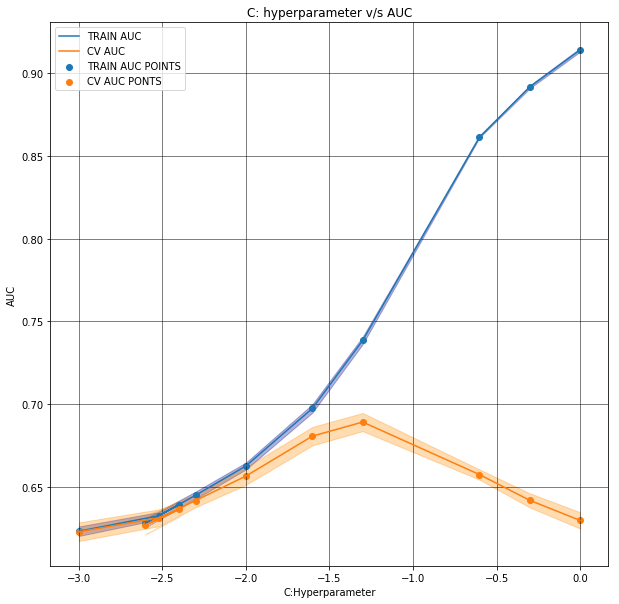

In [114]:
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
log_alphas = []
for a_alpla in tqdm(parameters['C']):
    #print(a_alpla)
    b_alpha = np.log10(a_alpla)
    log_alphas.append(b_alpha)


plt.figure(figsize=(10,10))
plt.plot(log_alphas,train_auc,label='TRAIN AUC')
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(log_alphas,cv_auc,label='CV AUC')
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas,train_auc,label='TRAIN AUC POINTS')
plt.scatter(log_alphas,cv_auc,label='CV AUC PONTS')

plt.legend()
plt.xlabel("C:Hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [115]:
best_c1=clf.best_params_
print(best_c1)

{'C': 0.05}


# Summary
* The best value for hyperparameter can be found as 0.05

# training the model using best hyperparameter value

In [116]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

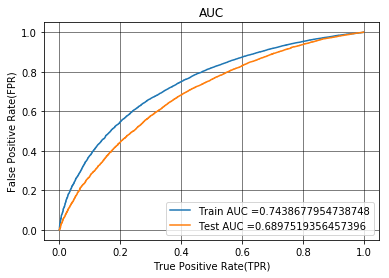

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C=0.05, penalty='l1', class_weight="balanced")
model.fit(X_train_stack,y_train)

y_train_pred = batch_predict(model,X_train_stack)
y_test_pred = batch_predict(model,X_test_stack)

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# CONFUSION MATRIX

In [118]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion Matrix Train Dataset

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999992746458477 for threshold 0.43
[[ 3711  3715]
 [ 7486 34129]]
the maximum value of tpr*(1-fpr) 0.24999992746458477 for threshold 0.43


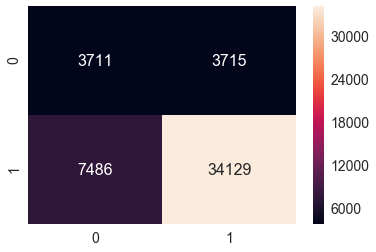

In [119]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary
* We observe nearly 37k true positives
* The number of false positives and true negatives are 4053
* The no of false negative are 8320



### Confusion Matrix Test Dataset

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.481
[[ 3114  2345]
 [ 8914 21679]]
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.481


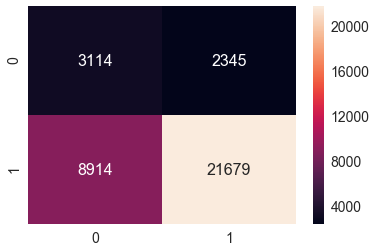

In [120]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)))
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# set2 Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`

In [121]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,tfidf_title_train,tfidf_train_text)).tocsr()


X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,tfidf_title_test,tfidf_test_text)).tocsr()


X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, tfidf_title_cv, tfidf_cv_text)).tocsr()

In [122]:
print("Final Data matrix")
print(X_train_stack.shape, y_train.shape)
print(X_cv_stack.shape, y_cv.shape)
print(X_test_stack.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7784) (49041,)
(24155, 7784) (24155,)
(36052, 7784) (36052,)


### gridsearch cv

In [123]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')
parameters = {'C':[ 1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}
clf = GridSearchCV(lr,parameters,cv=3,scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_train_stack,y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  11.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  10.9s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  18.8s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   6.0s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   9.1s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   5.9s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   2.7s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   3.4s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.5min finished


100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11061.46it/s]


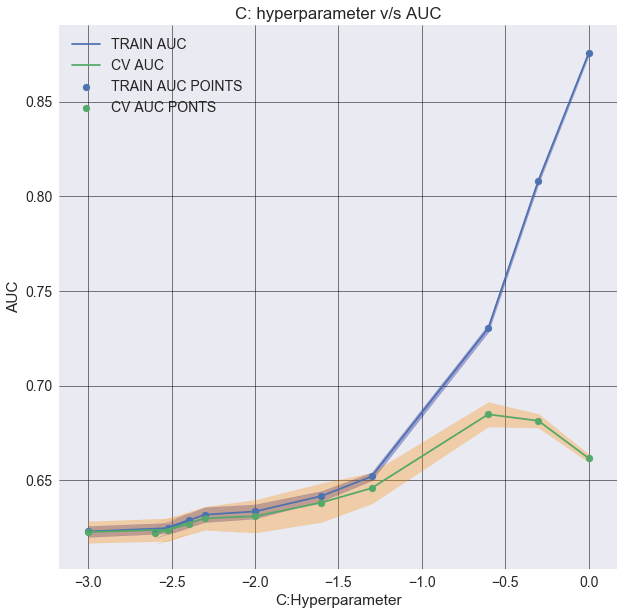

In [124]:
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
log_alphas = []
for a_alpla in tqdm(parameters['C']):
    b_alpha = np.log10(a_alpla)
    log_alphas.append(b_alpha)

plt.figure(figsize=(10,10))
plt.plot(log_alphas,train_auc,label='TRAIN AUC')
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(log_alphas,cv_auc,label='CV AUC')
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas,train_auc,label='TRAIN AUC POINTS')
plt.scatter(log_alphas,cv_auc,label='CV AUC PONTS')

plt.legend()
plt.xlabel("C:Hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [125]:
best_c2=clf.best_params_
print(best_c2)

{'C': 0.25}


### Summary
* So an optimal value of C is obtained at C=0.25

### Training model using best hyperparameter value

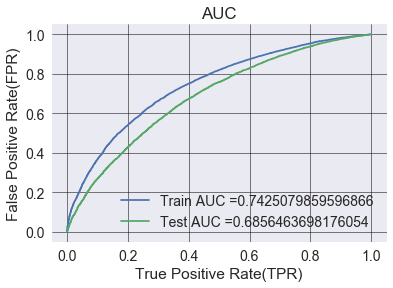

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C=0.25, penalty='l1', class_weight="balanced")
model.fit(X_train_stack,y_train)

y_train_pred = batch_predict(model,X_train_stack)
y_test_pred = batch_predict(model,X_test_stack)

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Summary
* We obtain a train AUC of 0.74 and a test AUC of 0.68

# CONFUSION MATRIX

In [127]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.433
[[ 3714  3712]
 [ 7530 34085]]


### Confusion Matrix Train Dataset

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.433


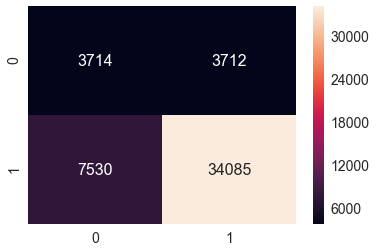

In [128]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* We observe that roughly 34k are true positives and false positives and true negatives are roughly same close to 3k+
* Number of false negatives are 7k roughly

### Confusion Matrix Train Dataset

In [129]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.484
[[ 3080  2379]
 [ 8989 21604]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.484


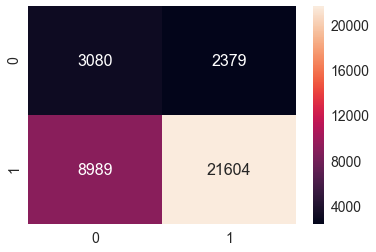

In [130]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* we have roughly 21k as true positives,3080 as true negatives
* The false negatives are approximately 9k



# Set 3: categorical, numerical features + project_title(`AVG W2V)`+ preprocessed_eassay (`AVG W2V`)

In [131]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,avg_w2v_title_train,avg_w2v_essay_train)).tocsr()


X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,avg_w2v_title_test,avg_w2v_essay_test)).tocsr()


X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, avg_w2v_title_cv, avg_w2v_essay_cv)).tocsr()

In [132]:
print("Final Data matrix")
print(X_train_stack.shape, y_train.shape)
print(X_cv_stack.shape, y_cv.shape)
print(X_test_stack.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


### gridsearch cv

In [133]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')
parameters = {'C':[ 1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}
clf = GridSearchCV(lr,parameters,cv=3,scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_train_stack,y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   5.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   8.6s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   9.5s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   5.3s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   6.4s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   6.1s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=  13.8s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=  14.5s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  3.0min finished


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


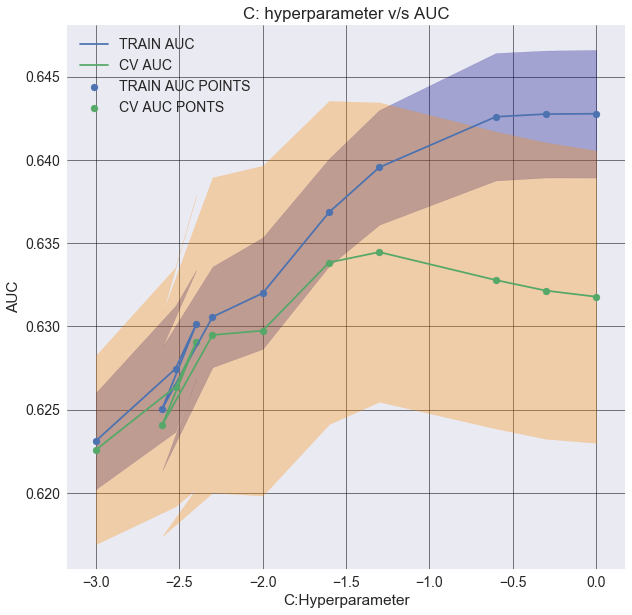

In [134]:
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
log_alphas = []
for a_alpla in tqdm(parameters['C']):
    b_alpha = np.log10(a_alpla)
    log_alphas.append(b_alpha)

plt.figure(figsize=(10,10))
plt.plot(log_alphas,train_auc,label='TRAIN AUC')
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(log_alphas,cv_auc,label='CV AUC')
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas,train_auc,label='TRAIN AUC POINTS')
plt.scatter(log_alphas,cv_auc,label='CV AUC PONTS')

plt.legend()
plt.xlabel("C:Hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [135]:
best_c3=clf.best_params_
print(best_c3)

{'C': 0.05}


### Summary
* Best optimal value of C is 0.05

### training model using best hyperparameter value

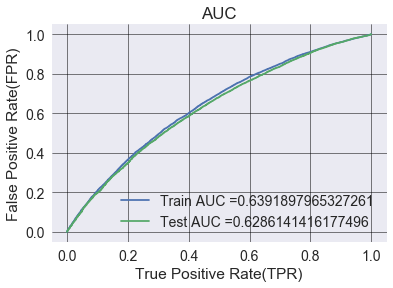

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C=0.05, penalty='l1', class_weight="balanced")
model.fit(X_train_stack,y_train)

y_train_pred = batch_predict(model,X_train_stack)
y_test_pred = batch_predict(model,X_test_stack)

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Summary
* we observe a test AUC of 0.64

# Confusion matrix

In [137]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.477
[[ 3713  3713]
 [12507 29108]]


### Confusion matrix for `train data`

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.477


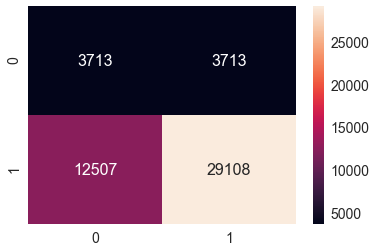

In [138]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* We observe 29k as no of true positives

### Confusion matrix for `test data`

In [139]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.512
[[ 3409  2050]
 [13398 17195]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.512


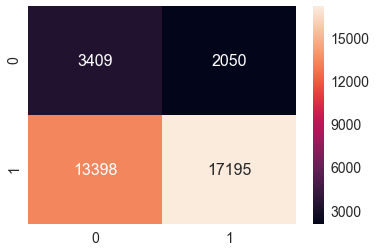

In [140]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* we observe nearly 17195 as true positives

# set4 Categorical, Numerical features + Project_title(`TFIDF W2V`) + Preprocessed_essay (`TFIDF W2V`)

In [141]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,tfidf_w2v_title_train,tfidf_w2v_essay_train)).tocsr()


X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,tfidf_w2v_title_test,tfidf_w2v_essay_test)).tocsr()


X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, tfidf_w2v_title_cv, tfidf_w2v_essay_cv)).tocsr()

In [142]:
print("Final Data matrix")
print(X_train_stack.shape, y_train.shape)
print(X_cv_stack.shape, y_cv.shape)
print(X_test_stack.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


### gridsearch cv

In [143]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')
parameters = {'C':[ 1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}
clf = GridSearchCV(lr,parameters,cv=3,scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_train_stack,y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   4.2s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   4.0s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   1.6s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   2.2s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   1.9s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.3s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.3s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   29.9s finished


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


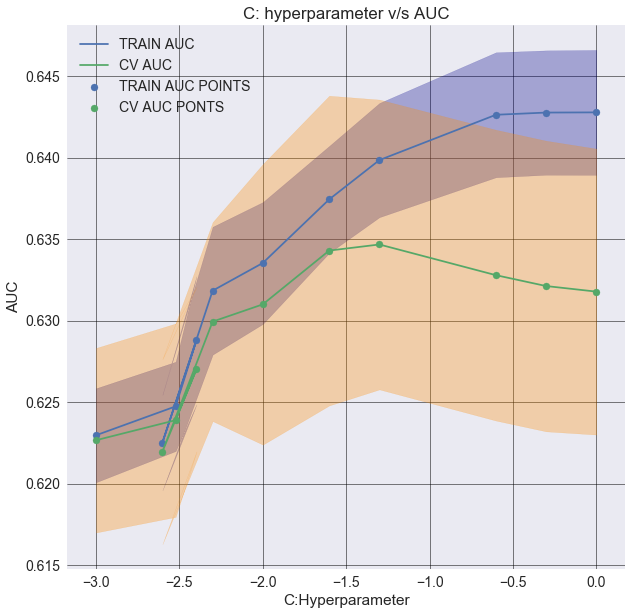

In [144]:
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
log_alphas = []
for a_alpla in tqdm(parameters['C']):
    b_alpha = np.log10(a_alpla)
    log_alphas.append(b_alpha)

plt.figure(figsize=(10,10))
plt.plot(log_alphas,train_auc,label='TRAIN AUC')
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(log_alphas,cv_auc,label='CV AUC')
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas,train_auc,label='TRAIN AUC POINTS')
plt.scatter(log_alphas,cv_auc,label='CV AUC PONTS')

plt.legend()
plt.xlabel("C:Hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [145]:
best_c4=clf.best_params_
print(best_c4)

{'C': 0.05}


### Summary
* So best optimal value of C is 0.05

### training model using best hyperparameter value

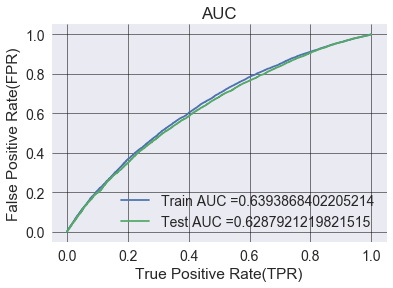

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C=0.05, penalty='l1', class_weight="balanced")
model.fit(X_train_stack,y_train)

y_train_pred = batch_predict(model,X_train_stack)
y_test_pred = batch_predict(model,X_test_stack)

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Summary
* we observe a test AUC of 0.63

# Confusion matrix

In [147]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.477
[[ 3713  3713]
 [12453 29162]]


### Confusion matrix for `train data`

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.477


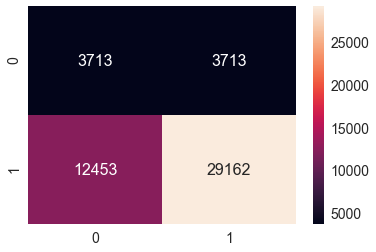

In [148]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

### Confusion matrix for `test data`

In [149]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.513
[[ 3426  2033]
 [13479 17114]]


the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.513


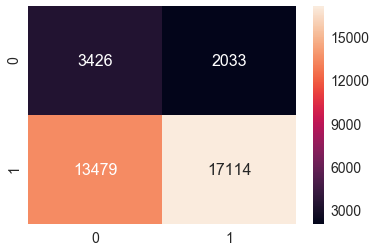

In [150]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* we observe nearly 17114 as true positives
* nearly 13479 are false negatives for test data



# set 5 `Categorical features`, `Numerical features` &` Essay Sentiments`

In [151]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train)).tocsr()

X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test,essay_word_count_test,essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test	)).tocsr()

X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv,essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv)).tocsr()

In [152]:
print("Final Data matrix")
print(X_train_stack.shape, y_train.shape)
print(X_cv_stack.shape, y_cv.shape)
print(X_test_stack.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 108) (49041,)
(24155, 108) (24155,)
(36052, 108) (36052,)


In [153]:
lr = LogisticRegression(penalty='l1',class_weight="balanced")

parameters = {'C':[ 0.25,0.1, 0.05, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_train_stack, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.2s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.0s
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total=   0.8s
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total=   0.7s
[CV] C

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   14.8s finished


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


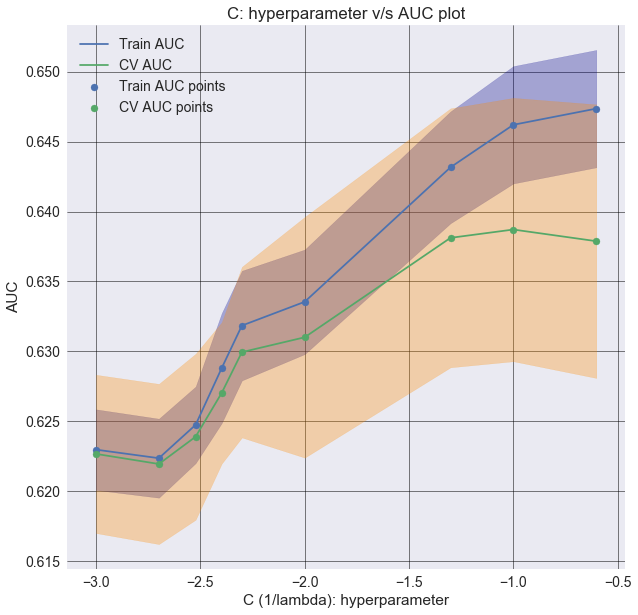

In [154]:
log_alphas = []
for a_alpla in tqdm(parameters['C']):
    b_alpha = np.log10(a_alpla)
    log_alphas.append(b_alpha)
plt.figure(figsize=(10,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C (1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [155]:
best_c5=clf.best_params_
print(best_c5)

{'C': 0.1}


### summary
* at C= 0.1 wwe obtain the optimal valu

# training model using best hyperparameter value

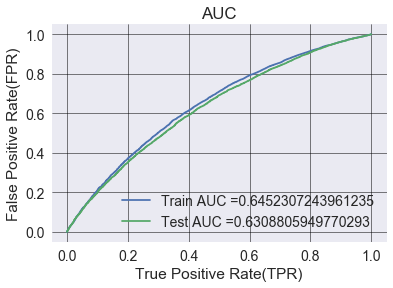

In [156]:
model = LogisticRegression(C = 0.1,penalty='l1',class_weight="balanced")
model.fit(X_train_stack, y_train)

y_train_pred = batch_predict(model, X_train_stack)    
y_test_pred = batch_predict(model, X_test_stack)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Confusion matrix

In [157]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.473
[[ 3713  3713]
 [12085 29530]]


### Confusion matrix train data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.478


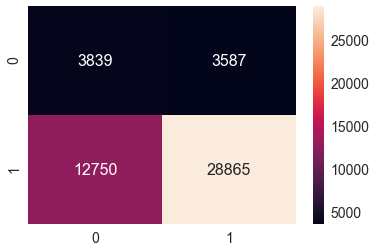

In [158]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_threshold, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* For train data we see 25k true positives and number of false positives is 19792 and true negatives (2922)

### Confusion matrix test data

In [159]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.513
[[ 3401  2058]
 [13217 17376]]


the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.513


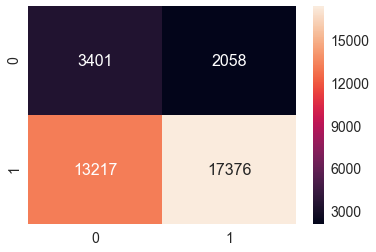

In [160]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, train_threshold, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary
* We observe highest no of true positives roughly to 17376
* The no of false negatives are also high close to 14k



In [161]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]

x.add_row(["BOW", "Logistic Regression", 0.05, 0.74])
x.add_row(["TFIDF", "Logistic Regression", 0.25, 0.74])
x.add_row(["AVG W2V", "Logistic Regression", 0.05, 0.64])
x.add_row(["TFIDF W2V", "Logistic Regression", 0.025, 0.64])
x.add_row(["WITHOUT TEXT", "Logistic Regression", 0.1, 0.64])


print(x)

+--------------+---------------------+-----------------------+------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter | AUC  |
+--------------+---------------------+-----------------------+------+
|     BOW      | Logistic Regression |          0.05         | 0.74 |
|    TFIDF     | Logistic Regression |          0.25         | 0.74 |
|   AVG W2V    | Logistic Regression |          0.05         | 0.64 |
|  TFIDF W2V   | Logistic Regression |         0.025         | 0.64 |
| WITHOUT TEXT | Logistic Regression |          0.1          | 0.64 |
+--------------+---------------------+-----------------------+------+
